In [1]:
import argparse
from random import choice, sample

import community as louvain
import networkx as nx
from tqdm import tqdm

from communityDetection import load_network
from evaluation import *
from models import nlta_algorithm, scan_algorithm
from models.scan import *
from utils import *

In [2]:
args = argparse.Namespace(
    networkFile='./sample_code/data/1-1.dat',
)

In [3]:
edges = [
    (0, 1),
    (0, 4),
    (0, 5),
    (0, 6),
    (1, 2),
    (1, 5),
    (2, 3),
    (2, 5),
    (3, 4),
    (3, 5),
    (3, 6),
    (4, 5),
    (4, 6),
    (6, 7),
    (6, 10),
    (6, 11),
    (7, 8),
    (7, 11),
    (7, 12),
    (8, 9),
    (8, 12),
    (9, 10),
    (9, 12),
    (9, 13),
    (10, 11),
    (10, 12),
    (11, 12),
]

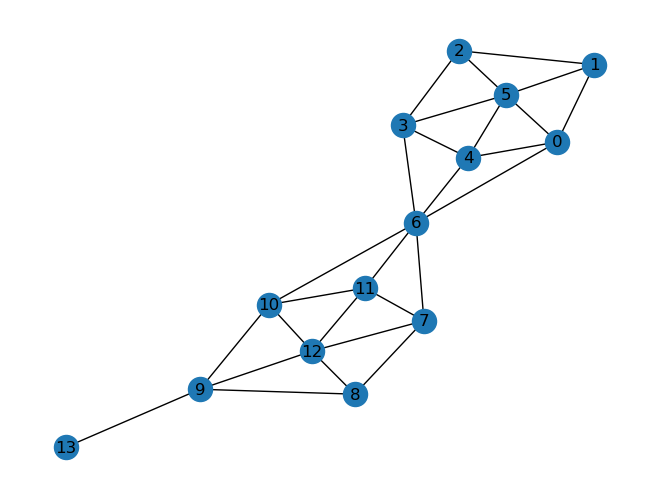

In [4]:
graph = nx.Graph()

for start, end in edges:
    graph.add_edge(start, end)
    graph.add_edge(end, start)

nx.draw(graph, with_labels=True)

In [40]:
# relationship between 0 and 11
def fuck(node1, node2, graph: nx.classes.graph.Graph):
    neighbors_1 = set(graph.neighbors(node1))
    neighbors_2 = set(graph.neighbors(node2)) | {node2}
    intersection = neighbors_1 & neighbors_2
    
    print(f'relationship {node1:2d} => {node2:2d} : {len(intersection) / len(neighbors_1):6.1%}')
    return

In [5]:
labels = scan_algorithm(graph, 0.7, 2)
labels

Second Labeling: 100%|██████████| 14/14 [00:00<00:00, 206035.99it/s]


{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 'hub',
 7: 7,
 8: 7,
 9: 7,
 10: 7,
 11: 7,
 12: 7,
 13: 'hub'}

In [7]:
labels = nlta_algorithm(graph)
labels

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 4,
 5: 4,
 6: 4,
 7: 7,
 8: 7,
 9: 7,
 10: 7,
 11: 7,
 12: 7,
 13: 7}